## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the Data and Inspecting it

In [2]:
google_data = pd.read_csv("dataset/googleplaystore.csv")

In [3]:
google_data.head(5) # reading top 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
google_data.shape # (rows, columns)

(10841, 13)

In [5]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


## Data Cleaning

### Looking for outliers

In [6]:
google_data['Rating'].unique() # for how much different values it has

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

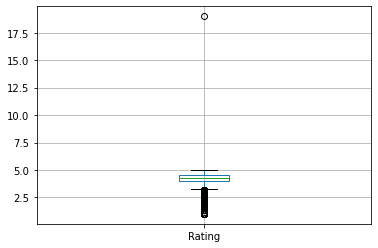

In [7]:
google_data.boxplot() # for checking condition for outlier value
plt.show()

In [8]:
google_data[google_data['Rating'] > 5]# finding the rows greater than 5 ratings

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
# getting the index of all outlier values
outlier_rating = google_data[google_data['Rating'] > 5].index

In [10]:
# droping the outlier value indexes
google_data.drop(outlier_rating, inplace = True)

In [11]:
# Reseting the index
google_data.reset_index(drop = True, inplace = True)

### Checking and Cleaning null values

In [12]:
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [13]:
google_data['Rating'].fillna(google_data["Rating"].median(), inplace = True)

In [14]:
# droping the rows if any of the column has null values
google_data.dropna(axis = 0, how = "any", inplace = True)
google_data.reset_index(drop = True, inplace = True)

In [15]:
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Data Wrangling or Manipulation

In [16]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10829 entries, 0 to 10828
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 592.3+ KB


In [17]:
# Reviews column converting into numeric
google_data["Reviews"] = pd.to_numeric(google_data["Reviews"], errors = "coerce", downcast= 'integer' )

In [18]:
# Installs column
google_data["Installs"] = google_data["Installs"].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
google_data["Installs"] = google_data["Installs"].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
google_data["Installs"] = google_data["Installs"].apply(lambda x: float(x))

In [19]:
# Price column
google_data["Price"] = google_data["Price"].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
google_data["Price"] = google_data["Price"].apply(lambda x: float(x))

In [20]:
# Content Rating column
google_data["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [21]:
google_data[google_data["Content Rating"] == "Unrated"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7306,Best CG Photography,FAMILY,4.3,1,2.5M,500.0,Free,0.0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up
8257,DC Universe Online Map,TOOLS,4.1,1186,6.4M,50000.0,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [22]:
google_data.loc[7306,"Content Rating"] = "Everyone 10+"
google_data.loc[8257,"Content Rating"] = "Teen"

In [23]:
google_data["Content Rating"].value_counts()

Everyone           8704
Teen               1209
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Name: Content Rating, dtype: int64

In [24]:
# function for change Content Rating
def C_R_change(x):
    if x == "Mature 17+":
        x = "Adult only 18+"
    if x == "Everyone 10+":
        x = "Teen"
    return x

In [25]:
google_data["Content Rating"] = google_data["Content Rating"].apply(C_R_change)

In [26]:
# Genres Column
google_data["Genres"] = google_data["Genres"].apply(lambda x: x.split(";")[0])

In [27]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10829 entries, 0 to 10828
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int32  
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  float64
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(3), int32(1), object(9)
memory usage: 676.9+ KB


In [28]:
google_data.describe()

,Rating,Reviews,Installs,Price
count,10829.000000,1.082900e+04,1.082900e+04,10829.000000
mean,4.206510,4.446018e+05,1.547990e+07,1.028091
std,0.480467,2.929213e+06,8.507114e+07,15.957778
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,5.000000e+03,0.000000
50%,4.300000,2.100000e+03,1.000000e+05,0.000000
75%,4.500000,5.481500e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


## Grouping the data

In [29]:
Category_group = google_data.groupby("Category")

# Visualization and Observations

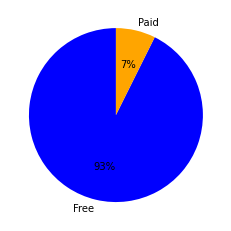

In [30]:
plt.pie(x = google_data["Type"].value_counts(), labels= ["Free", "Paid"], autopct= "%.0f%%", colors= ["blue", "orange"] , 
         startangle= 90)
plt.show()

### 93% of apps are Free and only 7% of apps are Paid.

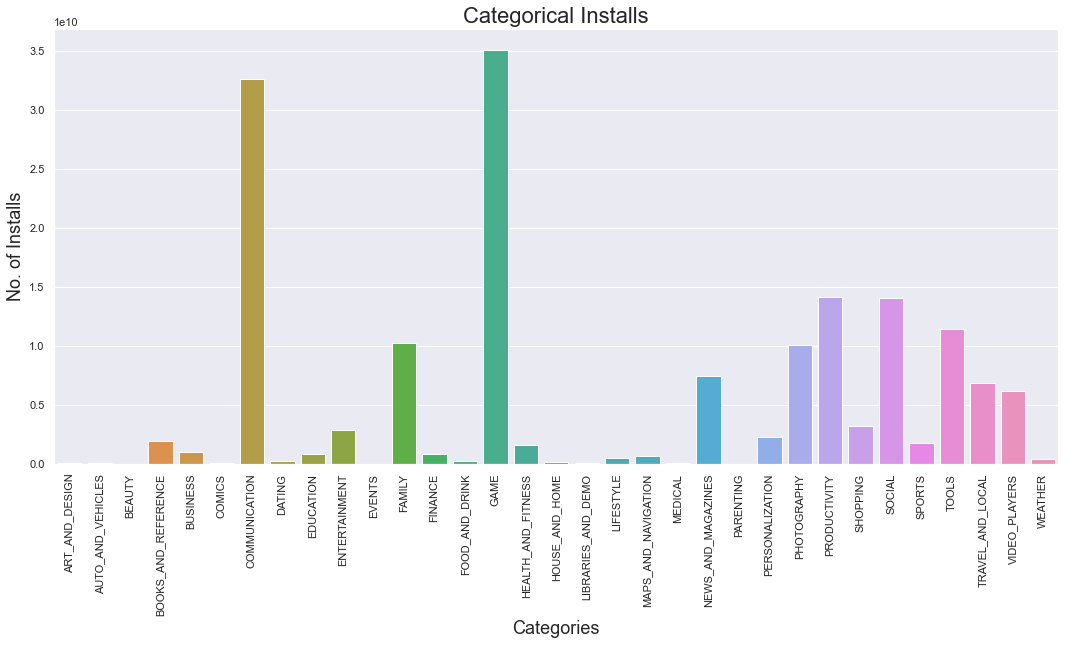

In [31]:
sns.set(rc={'figure.figsize':(18,8)})
sns.barplot( x = Category_group["Installs"].agg(np.sum).index, y= Category_group["Installs"].agg(np.sum) )
plt.xticks(rotation = 90)
plt.xlabel("Categories", fontsize = 18)
plt.ylabel("No. of Installs", fontsize = 18)
plt.title("Categorical Installs", fontsize = 22)
plt.show()

In [32]:
Category_group["Installs"].agg(np.sum).max()

35086024415.0

### Game catogorical apps has the most intalled apps of approx 3.5e10 Units .

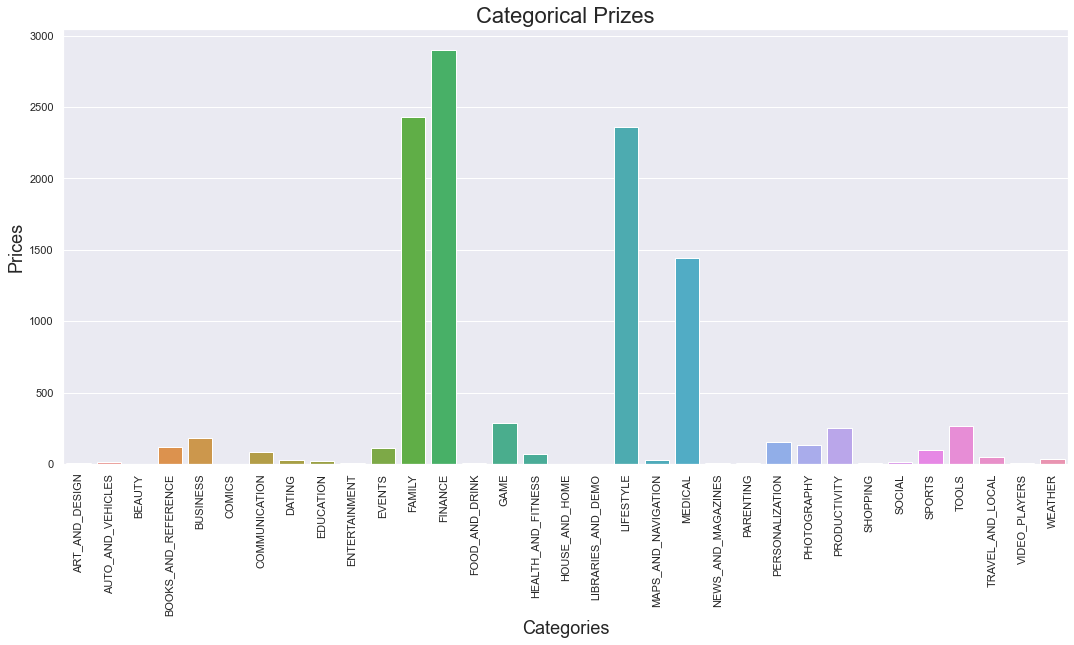

In [33]:
sns.set(rc={'figure.figsize':(18,8)})
sns.barplot(x = Category_group["Price"].agg(np.sum).index, y= Category_group["Price"].agg(np.sum))
plt.xticks(rotation = 90)
plt.xlabel("Categories", fontsize = 18)
plt.ylabel("Prices", fontsize = 18)
plt.title("Categorical Prizes", fontsize = 22)
plt.show()

In [34]:
Category_group["Price"].agg(np.sum).max()

2900.829999999998

### Finance catogorical apps has the most price of $ 2900.830 .

In [35]:
# total price of apps = number of installs * price of apps
total_price = Category_group["Installs"].agg(np.sum)*Category_group["Price"].agg(np.sum)

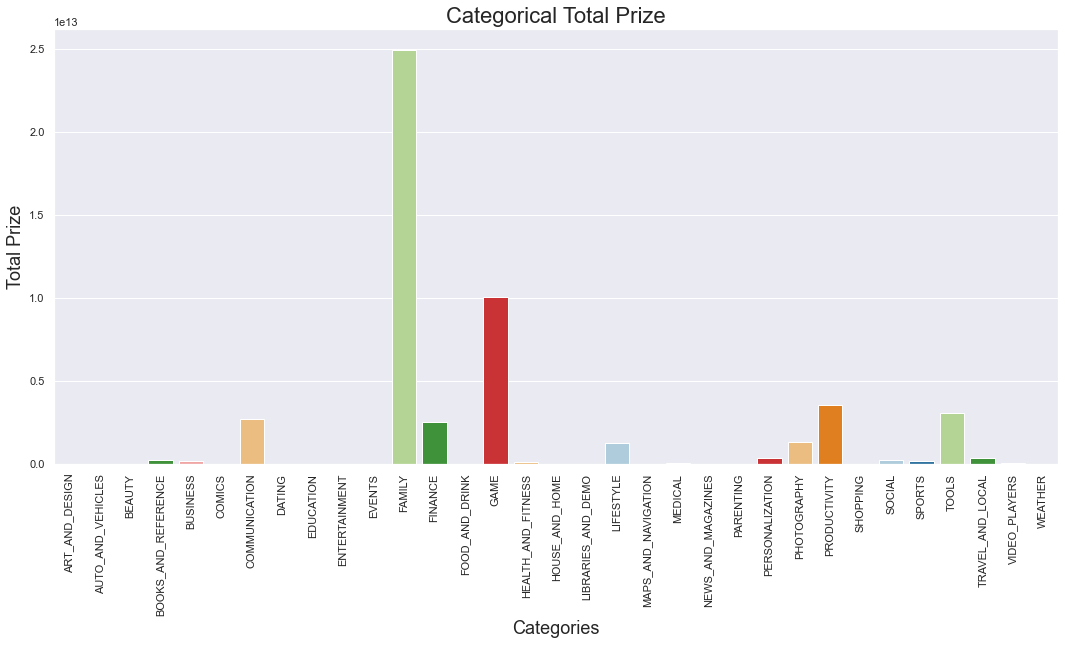

In [36]:
sns.set(rc={'figure.figsize':(18,8)})
sns.barplot(x= total_price.index, y= total_price.values, palette= sns.color_palette("Paired", 9))
plt.xticks(rotation = 90)
plt.xlabel("Categories", fontsize = 18)
plt.ylabel("Total Prize", fontsize = 18)
plt.title("Categorical Total Prize", fontsize = 22)
plt.show()

### Family categorical apps makes more money approx $ 2.5e13.

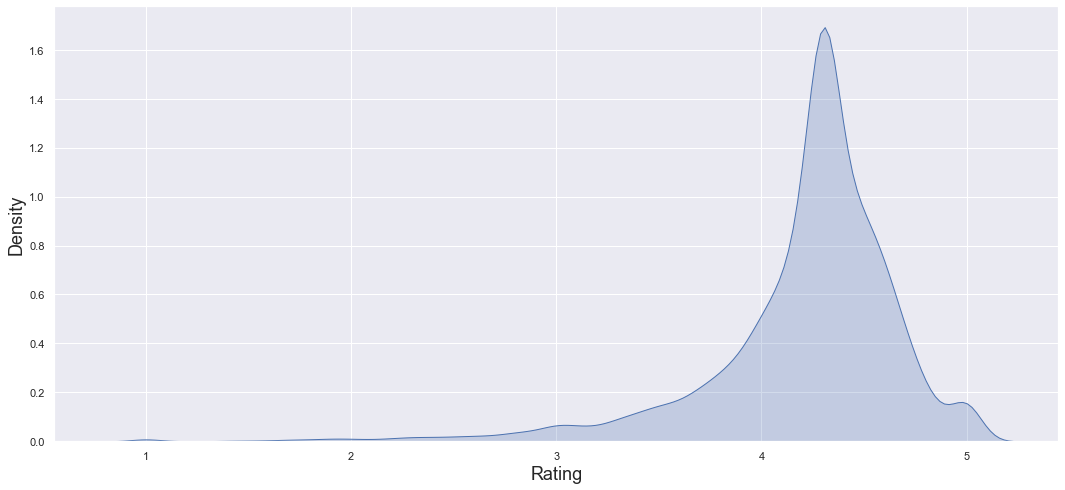

In [37]:
sns.kdeplot(data = google_data["Rating"], shade = "Fill",)
plt.xlabel("Rating", fontsize = 18)
plt.ylabel("Density", fontsize = 18)
plt.show()

In [38]:
google_data["Rating"].value_counts().head(3)

4.3    2545
4.4    1108
4.5    1037
Name: Rating, dtype: int64

### Most of the apps on goolge has very good rating between 3.5 to 5.0 . 
Around 2545 apps has rating of 4.3 , 1108 apps has rating 4.4 and 1037 apps has rating of 4.5 .

In [39]:
top_category_rating = google_data[["Category", "Rating"]].groupby(by = "Category").mean().sort_values(by = "Rating", ascending = False).reset_index().head(5)

In [40]:
top_category = [x for x in top_category_rating["Category"]]

In [41]:
def top(x):
    if x in top_category:
        return True
    else:
        return False

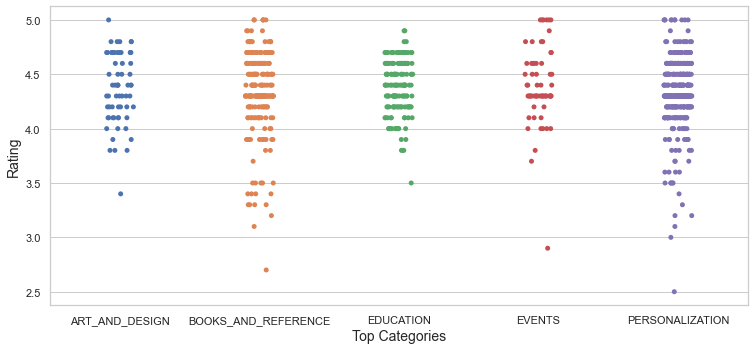

In [42]:
sns.set(style = "whitegrid",rc={'figure.figsize':(12.5,5.5)})
sns.stripplot(data = google_data[google_data["Category"].apply(top)], x = "Category", y = "Rating")
plt.xlabel("Top Categories", fontsize = 14)
plt.ylabel("Rating", fontsize = 14)
plt.show()

In [43]:
top_category

['EVENTS',
 'EDUCATION',
 'ART_AND_DESIGN',
 'BOOKS_AND_REFERENCE',
 'PERSONALIZATION']

### Top Rating Categoricals apps are:
1. Events
2. Education
3. Art and Design
4. Books and Reference
5. Personalization